# ARIMA model
---
ARIMA stands for autoregressive integrated moving average.
This model takes in three parameteres - p, d, q
 - p - lag order (order of AR term)  – number of lagged observations used
 - d - degree of differencing (order of I term) – number of times observations are differenced to make it stationary
 - q - order of moving average (order of MA term) – moving window size or number of lagged forecast errors to be considered for training the model

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

## Loading and exploring dataset

<AxesSubplot:xlabel='Month'>

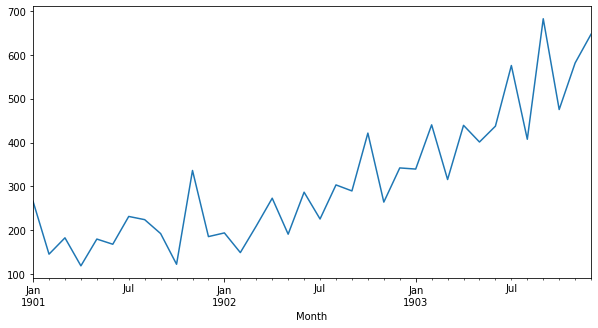

In [2]:
plt.rcParams["figure.figsize"] = (10, 5)

# Loading dataset
series = pd.read_csv('shampoo_dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# limiting index column to have only month and year values
series.index = series.index.to_period('M')

# studying the dataset to determine p, d, q
series.head()
series.plot()

## Checking for autocorrelation to decide 'd' value

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

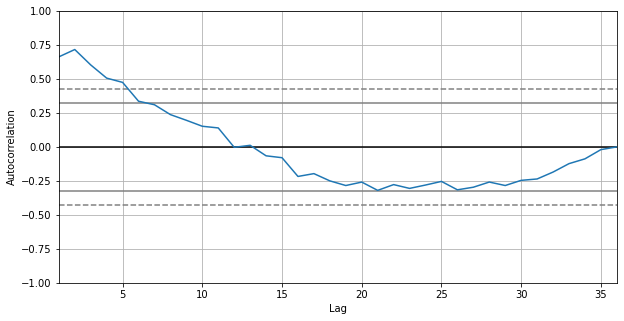

In [3]:
# autocorrelation plot
pd.plotting.autocorrelation_plot(series)

## Model training

In [4]:
# taking ~66% dataset for training
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]

history = [x for x in train]
predictions = []

## Model validation

In [5]:
# model training and validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, observed=%f' %(yhat,obs))

predicted=343.272180, observed=342.300000
predicted=293.329674, observed=339.700000
predicted=368.668956, observed=440.400000
predicted=335.044741, observed=315.900000
predicted=363.220222, observed=439.300000
predicted=357.645324, observed=401.300000
predicted=443.047835, observed=437.400000
predicted=378.365674, observed=575.500000
predicted=459.415021, observed=407.600000
predicted=526.890876, observed=682.000000
predicted=457.231274, observed=475.300000
predicted=672.914944, observed=581.300000
predicted=531.541449, observed=646.900000


## Model scoring

Test RMSE: 89.021


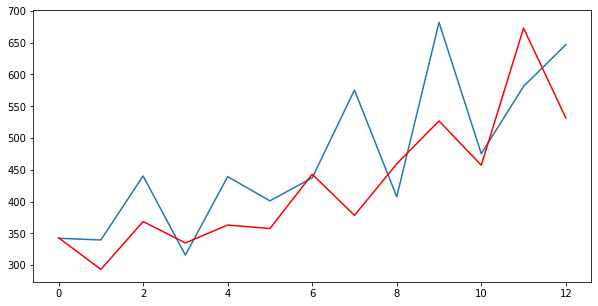

In [6]:
# scoring
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# visualizing predictions
plt.plot(test)
plt.plot(predictions, color='red')

## Model specifics

,0
count,35.000000
mean,20.956959
std,80.491231
min,-117.728732
25%,-35.579498
50%,8.111595
75%,57.931487
max,266.000000


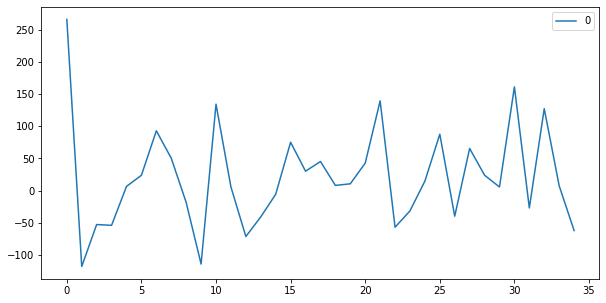

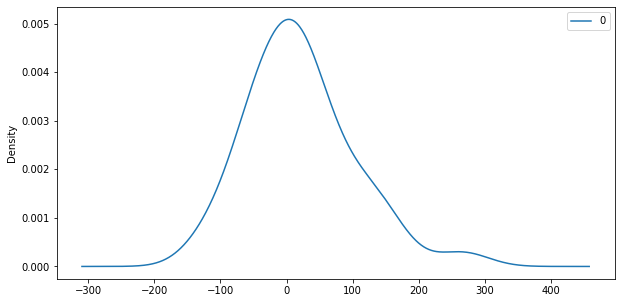

In [7]:
# model specifics
model_fit.summary()
residuals = pd.DataFrame(model_fit.resid)
# data after differencing
residuals.plot()
residuals.plot(kind='kde')
residuals.describe()